In [1]:
import numpy as np
data = np.loadtxt('../support/zipcombo.dat')

In [26]:
data.shape

(9298, 257)

In [32]:
def split_80_20(data, seed) -> (np.ndarray, np.ndarray):
    '''
    Splits 80% train 20% test

    :param data: sequence
    :return: train_data, test_data: np.ndarray, np.ndarray
    '''
    np.random.seed(seed)

    n = data.shape[0]
    shuffle = np.random.permutation(data)
    return shuffle[:int(n*0.8)], shuffle[int(n*0.8):]

In [63]:
def split_X_y(data):
    '''
    Splits the data into datapoints and labels, X_train matrix and y_train

    :param data: np.ndarray
    :return: X_train, y_train: np.ndarray, np.adarray
    '''

    return data[:, 1:], data[:, 0]


In [64]:
X_train, y_train = split_X_y(data)

In [58]:
import matplotlib.pyplot as plt

In [56]:
def display_digit(grayscale):
    plt.imshow(grayscale, cmap='gray')

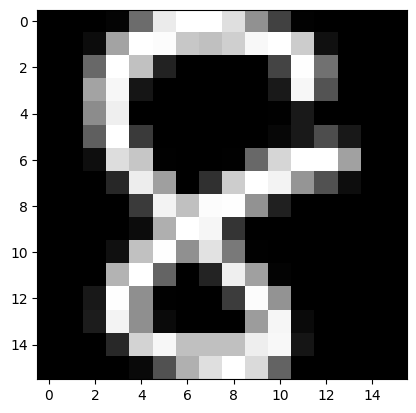

In [67]:
display_digit(np.reshape(data[:, 1:][100], (16, 16)))

### Part 1

#### Basic results:
- perform 20 runs
- each run for $d=1,...,7$
- each run randomly split $zipcombo.dat$ in 80% train and 20% test

In [5]:
from functools import partial
from typing import Callable, Iterable

In [3]:
def polynomial_kernel(x_i: np.ndarray, x_t: np.ndarray, d: int):
    return np.inner(x_i, x_t) ** d

In [ ]:
def gaussian_kernel(x_i: np.ndarray, x_j: np.ndarray, sigma=1):
    if x_i.shape[0] != x_j.shape[0]:
        raise Exception("Cannot apply kernel to vectors of different dimensions: x_i has shape {s1}, x_j has shape {s2}"
                        .format(s1=x_i.shape, s2=x_j.shape))
    diff = x_i - x_j
    return np.exp(-1 * np.inner(diff, diff) / (2 * sigma**2))

In [14]:
class KernelPerceptron:
    def __init__(self, kernel: Callable[[np.ndarray, np.ndarray], float]):
        self.kernel = kernel


    def _get_kernel_matrix(self, X_train):
        K = np.zeros((X_train.shape[0], X_train.shape[0]))

        for i in range(0, X_train.shape[0]):
            x_i = X_train[i, :]
            for j in range(i, X_train.shape[0]):
                x_j = X_train[j, :]
                K[i, j] = K[j, i] = self.kernel(x_i, x_j)

        return K


    def fit(self, X_train: np.ndarray, y_train: np.ndarray, n_epochs: int):
        self.X_train = X_train
        self.alpha = np.zeros(X_train.shape[0])

        # Compute kernel matrix which stays constant throught the algorithm and all epochs
        self.K = self._get_kernel_matrix(X_train)

        for epoch in range(0, n_epochs):
            for t in range(0, X_train.shape[0]):
                y_pred = np.sign(np.sum(np.inner(self.K[t, :t-1], self.alpha[:t-1])))
                if y_pred == y_train[t]:
                    self.alpha[t] = 0
                else:
                    self.alpha[t] = y_train[t]

    def predict(self, X: np.ndarray) -> np.ndarray:
        predictions = []
        for x_test in X:
            sum = 0
            for t in self.X_train.shape[0]:
                sum += self.alpha[t] * self.kernel(self.X_train[t, :], x_test)
            predictions.append(np.sign(sum))
        return np.array(predictions)

In [33]:
np.array(data)[0][2]

'0'

In [15]:
# Example usage of KernelPerceptron (untested)
kp = KernelPerceptron(kernel=partial(polynomial_kernel, d=3))
kp._get_kernel_matrix(np.array(lines))
#
# kp.fit(X_train, y_train, 100)
# y_outsample = kp.predict(X_test) # all predictions of test sample in y_outsample

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [8]:
seeds = np.random.randint(0, 100, 20)

mse_train = []
std_train = []

mse_test = []
std_test = []

for d in range(1, 7):
    for run in range(20):
        # different seed for each run
        train, test = split(lines, seeds[run])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
